### Robustness metrics plots

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
df_colors = pd.read_csv('../data/icd_colors.csv')

In [36]:
df_icd = pd.read_csv("../data/AllWeightedMetrics_withDistanceInverse_Chronic.csv")
df_icd.head()

,node,weighted_degree,closeness,betweenness,eigen_centrality,pagerank,community,age_group,metric_type,gender,net_type,weighted_density,average_path_length,modularity
0,I10-I15,0.250643,0.010080,0.028283,7.476358e-01,0.048326,1,1,Cosine,Female,Chronic,0.018087,137.525349,0.335598
1,E78,0.143712,0.009025,0.000000,4.874759e-01,0.028456,1,1,Cosine,Female,Chronic,0.018087,137.525349,0.335598
2,M40--M54,0.044036,0.005517,0.000000,9.550333e-02,0.013496,2,1,Cosine,Female,Chronic,0.018087,137.525349,0.335598
3,H17--H54,0.072495,0.008377,0.000000,1.754640e-01,0.019100,3,1,Cosine,Female,Chronic,0.018087,137.525349,0.335598
4,M15-M19,0.000000,NaN,0.000000,3.407118e-17,0.004630,4,1,Cosine,Female,Chronic,0.018087,137.525349,0.335598


In [37]:
metric_types = df_icd['metric_type'].unique()

plots_type = ['average_path_length','betweenness','closeness','modularity','weighted_degree','weighted_density']
print('plot_types   ', plots_type)
print('metric types:', metric_types)

plot_types    ['average_path_length', 'betweenness', 'closeness', 'modularity', 'weighted_degree', 'weighted_density']
metric types: ['Cosine' 'OR' 'Jaccard' 'JointPrev' 'Kulczynski' 'Lift' 'Phi' 'RelRisk']


In [38]:
filtered_df = df_icd[(df_icd['gender'] == 'Male') & (df_icd['metric_type'] == 'Jaccard')]
print(filtered_df.shape)
filtered_df.head()


(368, 14)


,node,weighted_degree,closeness,betweenness,eigen_centrality,pagerank,community,age_group,metric_type,gender,net_type,weighted_density,average_path_length,modularity
1472,I10-I15,0.117119,0.003162,0.040404,0.994597,0.054820,1,1,Jaccard,Male,Chronic,0.011541,468.639115,0.381786
1473,E78,0.010565,0.002310,0.000000,0.071781,0.009566,1,1,Jaccard,Male,Chronic,0.011541,468.639115,0.381786
1474,M40--M54,0.018156,0.002036,0.000000,0.112468,0.013022,2,1,Jaccard,Male,Chronic,0.011541,468.639115,0.381786
1475,H17--H54,0.040641,0.002877,0.054545,0.213418,0.023990,2,1,Jaccard,Male,Chronic,0.011541,468.639115,0.381786
1476,M15-M19,0.000000,NaN,0.000000,0.000000,0.004511,3,1,Jaccard,Male,Chronic,0.011541,468.639115,0.381786


In [ ]:
print(results)

{'average_path_length': [], 'betweennness': [], 'closeness': [], 'modularity': [], 'weighted_degree': [], 'weighted_density': []}


In [39]:
male_results = {key:{} for key in plots_type}
female_results = {key:{} for key in plots_type}

for p_type in plots_type:
    for metric in metric_types:
        
        filtered_df_male = df_icd[(df_icd['gender'] == 'Male') & (df_icd['metric_type'] == metric)]
        filtered_df_female = df_icd[(df_icd['gender'] == 'Female') & (df_icd['metric_type'] == metric)]

        grouped_data_male = filtered_df_male.groupby('age_group')[p_type].mean().reset_index()
        grouped_data_female = filtered_df_female.groupby('age_group')[p_type].mean().reset_index()

        male_results[p_type][metric] = grouped_data_male[p_type]
        female_results[p_type][metric] = grouped_data_female[p_type]        

        

In [40]:
avg_p_length = male_results['average_path_length']
avg_p_length

{'Cosine': 0    151.364118
 1     66.950749
 2     83.491067
 3     45.885081
 4     32.222290
 5     22.219221
 6     17.780714
 7     15.401922
 Name: average_path_length, dtype: float64,
 'OR': 0         NaN
 1    0.312470
 2    0.804472
 3    0.740026
 4    0.873361
 5    0.815934
 6    0.734861
 7    0.671589
 Name: average_path_length, dtype: float64,
 'Jaccard': 0    468.639115
 1    152.901362
 2    300.204508
 3    221.359994
 4    137.947642
 5     78.698337
 6     64.797339
 7     56.506800
 Name: average_path_length, dtype: float64,
 'JointPrev': 0    6409.898255
 1    2018.490387
 2    3747.323727
 3    2240.206840
 4    1204.313991
 5     497.268081
 6     335.549606
 7     295.571927
 Name: average_path_length, dtype: float64,
 'Kulczynski': 0    96.399477
 1    57.032551
 2    58.935617
 3    30.365135
 4    18.437672
 5    10.367578
 6     7.379485
 7     6.237848
 Name: average_path_length, dtype: float64,
 'Lift': 0    3.455996
 1    1.967529
 2    2.079448
 3    1.2

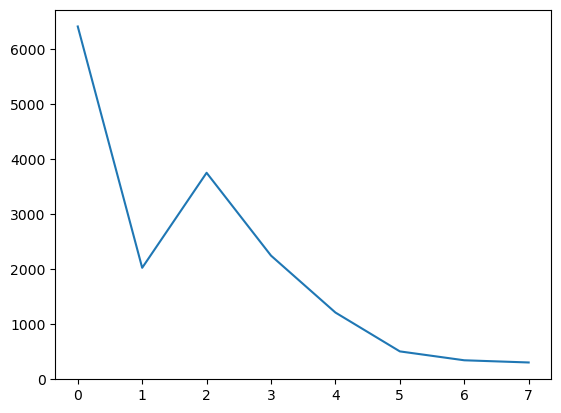

In [41]:
plt.plot(avg_p_length['JointPrev'])